<h2>Library</h2>

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import warnings

warnings.filterwarnings('ignore')

<h2>Colors</h2>

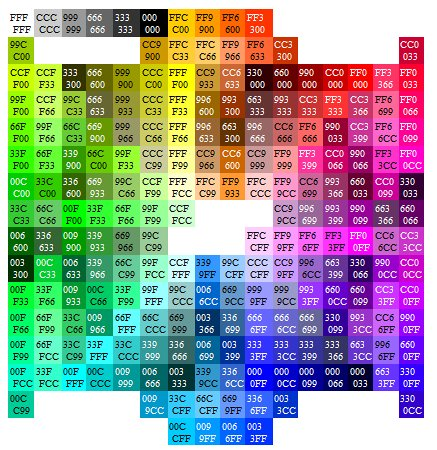

<h2>Main</h2>

In [2]:
folder_path = r'C:\Users\Rafael_Fagundes\Downloads\compiled_data.csv'

df = pd.read_csv(folder_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711983 entries, 0 to 1711982
Data columns (total 48 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Unnamed: 0                                   int64  
 1   Audience Type                                object 
 2   Tactic                                       object 
 3   Media Buy Name                               object 
 4   Campaign Name                                object 
 5   Fiscal Quarter                               object 
 6   Fiscal Week                                  object 
 7   Country_x                                    object 
 8   Display Funnel Mapped                        object 
 9   Display Dell Vehicle Mapped                  object 
 10  Display Business Unit Mapped                 object 
 11  Display Site Name Mapped                     object 
 12  Audience Type Name                           object 
 13  Impressions 

In [4]:
# Dataframe filtered only by Claravine Ids and from FY24Q3
filtered_df = df[(df['Segment ID'] != 0) & (df['Segment ID'] != '0') & (df['Fiscal Quarter'] == '2024-Q3')]

In [5]:
# Checking the number of Unique Audiences in FY24Q3
filtered_df['Segment ID'].nunique()

138

<h2>Sankey Driagram for Audiences created by Dell</h2>

In [6]:
agg_df_lvl1 = filtered_df.groupby(['BU','Audience Type'])['Segment ID'].nunique().reset_index()
agg_df_lvl1

,BU,Audience Type,Segment ID
0,B2B,1PD,13
1,B2B,3PD,50
2,CSB,1PD,41
3,CSB,3PD,35


In [7]:
agg_df_lvl2 = filtered_df.groupby(['BU', 'Audience Type', 'Display Dell Vehicle Mapped'])['Segment ID'].nunique().reset_index()
agg_df_lvl2.head()

,BU,Audience Type,Display Dell Vehicle Mapped,Segment ID
0,B2B,1PD,Display,13
1,B2B,1PD,Social,4
2,B2B,3PD,Display,50
3,CSB,1PD,Display,27
4,CSB,1PD,Display Dco,8


<h2>Merge tables</h2>

In [8]:
agg_df_lvl1.rename(columns={'BU':'Source', 'Audience Type':'Target', 'Segment ID':'Value'}, inplace=True)
agg_df_lvl2.rename(columns={'Audience Type':'Source', 'Display Dell Vehicle Mapped':'Target', 'Segment ID':'Value'}, inplace=True)

In [9]:
concat_df = pd.concat([agg_df_lvl1[['Source', 'Target', 'Value']]
                       , agg_df_lvl2[['Source','Target','Value']]
                      ], ignore_index=True)

In [10]:
unique_sources_and_targets = pd.unique(concat_df[['Source', 'Target']].values.ravel('K'))
unique_sources_and_targets

array(['B2B', 'CSB', '1PD', '3PD', 'Display', 'Social', 'Display Dco',
       'Display Mobile', 'Lead Generation', 'Video', 'Audio'],
      dtype=object)

<table>
    <tr>
        <td>B2B</td><td>CSB</td><td>1PD</td><td>3PD</td><td>Display</td><td>Social</td><td>Video</td><td>Audio</td><td>Display Dco</td><td>Display Mobile</td><td>Lead Generation</td><td>CTV</td>
    </tr>
    <tr>
        <td>0</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td><td>7</td><td>8</td><td>9</td><td>10</td><td>11</td>
    </tr>
</table>

In [11]:
mapping_df = pd.DataFrame({'Label': ['B2B', 'CSB', '1PD', '3PD', 'Display', 'Social', 'Video', 'Audio', 'Display Dco', 'Display Mobile', 'Lead Generation', 'CTV'],
              'Value': [ 0, 1, 2, 3,4,5,6,7,8,9,10,11]})

In [12]:
mapping_df

,Label,Value
0,B2B,0
1,CSB,1
2,1PD,2
3,3PD,3
4,Display,4
5,Social,5
6,Video,6
7,Audio,7
8,Display Dco,8
9,Display Mobile,9


In [13]:
# Replace values based on the mappings
concat_df['Source'] = concat_df['Source'].replace(mapping_df.set_index('Label')['Value'])
concat_df['Target'] = concat_df['Target'].replace(mapping_df.set_index('Label')['Value'])

In [49]:
concat_df

,Source,Target,Value
0,0,2,13
1,0,3,50
2,1,2,41
3,1,3,35
4,2,4,13
5,2,5,4
6,3,4,50
7,2,4,27
8,2,8,8
9,2,9,3


In [84]:
# Your existing data
source = concat_df['Source'].values.tolist()
target = concat_df['Target'].values.tolist()
value = concat_df['Value'].values.tolist()
labels = mapping_df['Label'].values.tolist()

# list of colors for each link based on some condition or data
colors = []
for tgts in target:
    if tgts == 2:
        colors.append("#1885C3")
    elif tgts == 3:
        colors.append('#436F00')
    elif tgts == 4:
        colors.append("#442200")
    elif tgts == 5:
        colors.append("#925400")
    elif tgts == 6:
        colors.append("#B36F00")
    elif tgts == 7:
        colors.append("#E6AC28")
    elif tgts == 8:
        colors.append("#A8396F")
    elif tgts == 9:
        colors.append("#CB548D")
    elif tgts == 10:
        colors.append("#F69AC6")
    else:
        colors.append("#000000")  # Default color for other cases

# Create links with specified colors
link = dict(source=source, target=target, value=value, color=colors)

# Create nodes
node = dict(label=labels, pad=30, thickness=20)

# Create a Sankey object
chart = go.Sankey(link=link, node=node, arrangement="snap")

# Build a figure
fig = go.Figure(chart)

# Show the figure
fig.show()


<h2>Sankey Diagram for CSB Audiences in FY24Q3</h2>

In [16]:
csb_df = df[(df['BU'] == 'CSB') & (df['Fiscal Quarter'] == '2024-Q3')]

csb_agg_df_lvl1 = csb_df.groupby(['Audience Type', 'Display Dell Vehicle Mapped'])['Spend'].sum().reset_index()
csb_agg_df_lvl1.head()

,Audience Type,Display Dell Vehicle Mapped,Spend
0,1PD,Direct,0.000000e+00
1,1PD,Display,1.207278e+06
2,1PD,Display Dco,1.804959e+05
3,1PD,Display Mobile,8.987899e+04
4,1PD,Email,0.000000e+00


In [17]:
csb_agg_df_lvl1.rename(columns={'Audience Type':'Source', 'Display Dell Vehicle Mapped':'Target', 'Spend':'Value'}, inplace=True)

In [18]:
csb_unique_values = pd.unique(csb_agg_df_lvl1[['Source', 'Target']].values.ravel('K'))
print(csb_unique_values)
print(len(csb_unique_values))

['1PD' '3PD' 'Direct' 'Display' 'Display Dco' 'Display Mobile' 'Email'
 'Lead Generation' 'Other' 'Search' 'Social' 'Video' 'AFF' 'Affiliates'
 'Audio' 'CTV']
16


In [19]:
csb_mapping_df = pd.DataFrame({'Label': ['1PD','3PD','Direct','Display','Display Dco','Display Mobile','Email', 'Lead Generation','Other','Search','Social','Video','AFF','Affiliates', 'Audio','CTV'],
              'Value': [ 0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]})

In [20]:
# Replace values based on the mappings
csb_agg_df_lvl1['Source'] = csb_agg_df_lvl1['Source'].replace(csb_mapping_df.set_index('Label')['Value'])
csb_agg_df_lvl1['Target'] = csb_agg_df_lvl1['Target'].replace(csb_mapping_df.set_index('Label')['Value'])

In [74]:
csb_source

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [79]:
# Sample data
csb_source = csb_agg_df_lvl1['Source'].values.tolist()
csb_target = csb_agg_df_lvl1['Target'].values.tolist()
csb_value = csb_agg_df_lvl1['Value'].values.tolist()
csb_labels = csb_mapping_df['Label'].values.tolist()

# list of colors for each link based on some condition or data
colors = []
for tgts in csb_source:
    if tgts == 0:
        colors.append("#1885C3")
    else:
        colors.append("#436F00")  # Default color for other cases

# Create links with specified colors
link = dict(source=source, target=target, value=value, color=colors)

# Create links
csb_link = dict(source=csb_source, target=csb_target, value=csb_value, color=colors)

# Create nodes
node = dict(label=csb_labels, pad=30, thickness=20)

# Create a Sankey object
chart = go.Sankey(link=csb_link, node=node, arrangement="snap")

# Build a figure
fig = go.Figure(chart)
fig.show()


<h2>Sankey Diagram for CSB Audiences in FY24Q3</h2>

In [22]:
b2b_df = df[(df['BU'] == 'B2B') & (df['Fiscal Quarter'] == '2024-Q3')]

b2b_agg_df_lvl1 = b2b_df.groupby(['Audience Type', 'Display Dell Vehicle Mapped'])['Spend'].sum().reset_index()

b2b_agg_df_lvl1.rename(columns={'Audience Type':'Source', 'Display Dell Vehicle Mapped':'Target', 'Spend':'Value'}, inplace=True)

In [23]:
b2b_unique_values = pd.unique(b2b_agg_df_lvl1[['Source', 'Target']].values.ravel('K'))
print(b2b_unique_values)
print(len(b2b_unique_values))

['1PD' '3PD' 'Display' 'Display Dco' 'Social' 'Video' 'Display Mobile'
 'Lead Generation' 'Other']
9


In [24]:
b2b_mapping_df = pd.DataFrame({'Label': ['1PD','3PD','Display','Display Dco','Social','Video','Display Mobile','Lead Generation','Other'],
              'Value': [ 0, 1, 2, 3,4,5,6,7,8]})

In [25]:
# Replace values based on the mappings
b2b_agg_df_lvl1['Source'] = b2b_agg_df_lvl1['Source'].replace(b2b_mapping_df.set_index('Label')['Value'])
b2b_agg_df_lvl1['Target'] = b2b_agg_df_lvl1['Target'].replace(b2b_mapping_df.set_index('Label')['Value'])

In [78]:
# Sample data
b2b_source = b2b_agg_df_lvl1['Source'].values.tolist()
b2b_target = b2b_agg_df_lvl1['Target'].values.tolist()
b2b_value = b2b_agg_df_lvl1['Value'].values.tolist()
b2b_labels = b2b_mapping_df['Label'].values.tolist()

# list of colors for each link based on some condition or data
colors = []
for tgts in b2b_source:
    if tgts == 0:
        colors.append("#1885C3")
    else:
        colors.append("#436F00")  # Default color for other cases

# Create links
b2b_link = dict(source=b2b_source, target=b2b_target, value=b2b_value, color=colors)

# Create nodes
node = dict(label=b2b_labels, pad=30, thickness=20)

# Create a Sankey object
chart = go.Sankey(link=b2b_link, node=node, arrangement="snap")

# Build a figure
fig = go.Figure(chart)
fig.show()
